<center><img src="http://milestonetechs.com/media/filer_public_thumbnails/filer_public/24/26/24260fc4-2637-4348-b2bd-3c333f2f806d/python_logo.jpg__800x250_q85_crop_subsampling-2.jpg" width="1000"></center>

# Programa de Especialización en Python

## Tema 4. Métodos jerárquicos: código

### Prof. Manuel Sigüeñas, M.Sc.(c)
[msguenas@socialdata-peru.com](msguenas@socialdata-peru.com)

In [1]:
from IPython.display import Image
%matplotlib inline

<a id='part2'></a>
## Agrupamiento con método jerárquico

##### Agrupamiento clusters de abajo hacia arriba

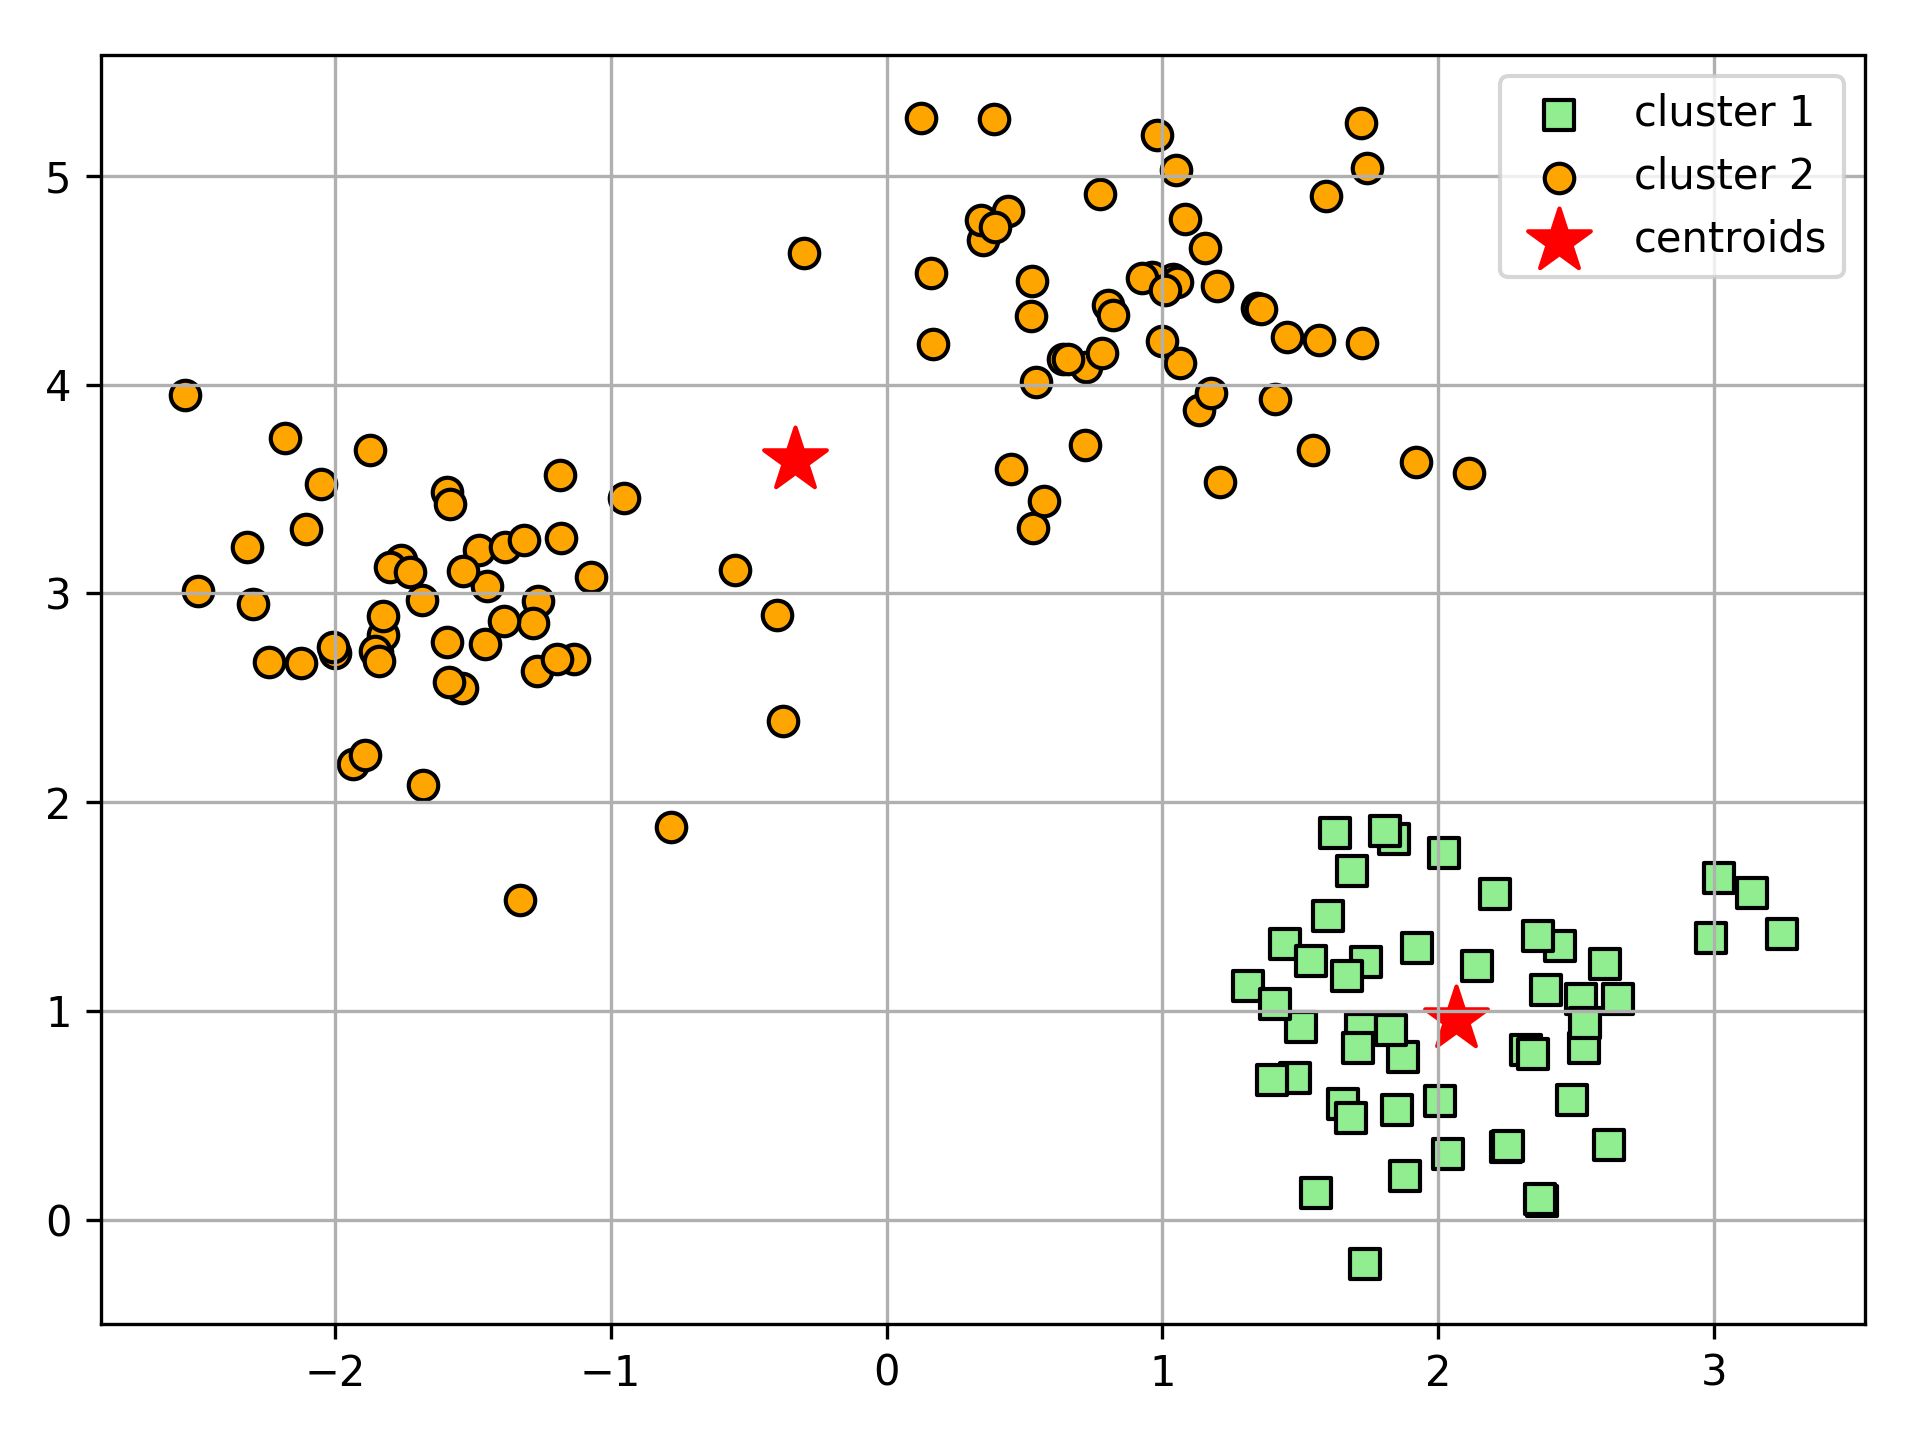

In [2]:
Image(filename='D:/Python/2. Nivel II/1/imagenes/01_01.png', width=400) 

In [3]:
import pandas as pd
import numpy as np

In [4]:
np.random.seed(123)

variables = ['X', 'Y', 'Z'] #variables
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4'] #valores

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


##### Realizando agrupamiento jerárquico sobre una matriz de distancia

In [5]:
from scipy.spatial.distance import pdist, squareform

In [6]:
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


Podemos pasar una matriz de distancia condensed (triangular superior) desde la función `pdist`, o podemos pasar la matriz de datos "original" y definir el argumento` metric = 'euclidean'` en `linkage`. Sin embargo, no deberíamos pasar la matriz de distancia de forma cuadrada, que produciría diferentes valores de distancia, aunque la agrupación general podría ser la misma.

In [7]:
from scipy.cluster.hierarchy import linkage

In [8]:
# 1. enfoque incorrecto: matriz de distancia de forma cuadrada
row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,6.521973,2.0
cluster 2,1.0,2.0,6.729603,2.0
cluster 3,3.0,5.0,8.539247,3.0
cluster 4,6.0,7.0,12.444824,5.0


In [9]:
# 2. enfoque correcto: matriz de distancia condensed (condensada)
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [10]:
# 3. enfoque correcto: matriz de muestra imput
row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [14]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

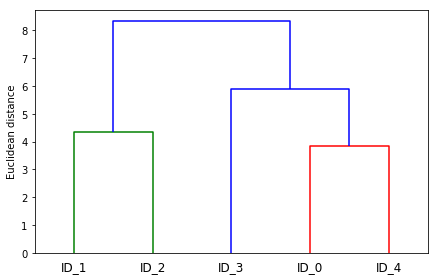

In [15]:
# realizar dendograma clásico-negro (part 1/2)
#from scipy.cluster.hierarchy import set_link_color_palette
#set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # realizar dendograma clásico-negro (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

##### Dendograma en un mapa de calor

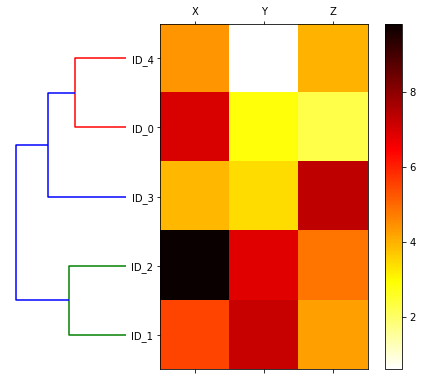

In [17]:
# dendograma de fila
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# nota: for matplotlib < v1.5.1, usar orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# reordenar datos con respecto a la aplicación
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remover eje del dendograma
for i in axd.spines.values():
    i.set_visible(False)

# mapa de calor
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

#plt.savefig('images/11_12.png', dpi=300)
plt.show()